In [25]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt


In [26]:
data_raw = pd.read_csv('./data/dataset.csv')
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [27]:
data_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [28]:
data_raw.duplicated().sum()

0

In [30]:
data_raw.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [31]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imputer = imputer.fit_transform(data_raw)

data = pd.DataFrame(data_imputer, columns=data_raw.columns)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [32]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
data_dummies = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
data_dummies

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,False,True,False,...,False,False,False,False,True,True,False,False,True,False
1,30468,58.0,1,0,87.96,39.2,0,False,True,False,...,False,False,True,False,False,False,True,False,True,False
2,16523,8.0,0,0,110.89,17.6,0,True,False,False,...,False,False,True,False,False,False,True,False,True,False
3,56543,70.0,0,0,69.04,35.9,0,True,False,False,...,False,False,True,False,False,True,False,True,False,False
4,46136,14.0,0,0,161.28,19.1,0,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0,True,False,False,...,False,False,False,False,True,False,True,False,True,False
43396,5450,56.0,0,0,213.61,55.4,0,True,False,False,...,True,False,False,False,False,False,True,True,False,False
43397,28375,82.0,1,0,91.94,28.9,0,True,False,False,...,False,False,True,False,False,False,True,True,False,False
43398,27973,40.0,0,0,99.16,33.2,0,False,True,False,...,False,False,True,False,False,False,True,False,True,False


In [35]:
standard_scaler = StandardScaler()
data_standard = standard_scaler.fit_transform(data_dummies)
data_standard

array([[-2.68468646e-01, -1.74151677e+00, -3.21295643e-01, ...,
        -4.56812843e-01,  6.92067362e-01, -4.22056012e-01],
       [-2.78007420e-01,  7.00823003e-01,  3.11239826e+00, ...,
        -4.56812843e-01,  6.92067362e-01, -4.22056012e-01],
       [-9.39789471e-01, -1.51948588e+00, -3.21295643e-01, ...,
        -4.56812843e-01,  6.92067362e-01, -4.22056012e-01],
       ...,
       [-3.77334048e-01,  1.76657127e+00,  3.11239826e+00, ...,
         2.18908031e+00, -1.44494605e+00, -4.22056012e-01],
       [-3.96411594e-01, -9.84881955e-02, -3.21295643e-01, ...,
        -4.56812843e-01,  6.92067362e-01, -4.22056012e-01],
       [-2.61686753e-03,  1.76657127e+00, -3.21295643e-01, ...,
        -4.56812843e-01,  6.92067362e-01, -4.22056012e-01]])

In [39]:
data_reduced = PCA(n_components=0.95).fit_transform(data_standard)
df_reduced = pd.DataFrame(data=data_reduced)

In [37]:
data_tsne = pd.DataFrame(TSNE(random_state=0).fit_transform(data_reduced))

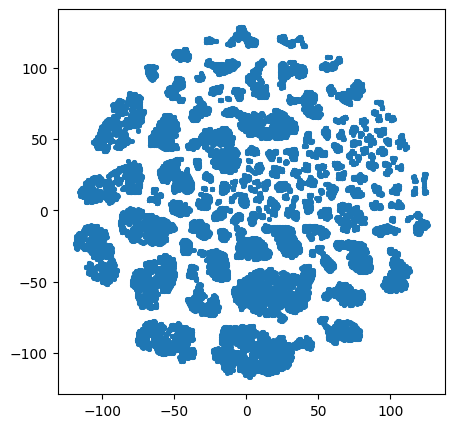

In [57]:
labels = ['Inliers', 'Outliers']
plt.figure(figsize=(5, 5))
for i in range(1):
    selections = data_tsne.iloc[df_reduced[df_reduced==i].index]
    plt.scatter(selections[0], selections[1], label=labels[i], s=7)
plt.show()

